In [13]:
import numpy as np
from numpy.random import randn
from matplotlib import pyplot as plt
%matplotlib inline

In [84]:
n = 90
c = 3

class DataGenerator:
    def __init__(self, n=90, c=3):
        assert(n % c == 0)
        length = n // c
        self._classes = np.arange(1, c + 1)
        self._y = np.array([np.ones(length) * i for i in range(1, c + 1)])
        self._x = randn(c, length) + np.array([np.linspace(-3, 3, c)] * length).T

    @property
    def x_1d(self):
        return self._x.reshape(-1)

    @property
    def y_1d(self):
        return self._y.reshape(-1)

    @property
    def classes(self) -> list:
        return list(self._classes)


In [123]:
class GauseKernelRegression:
    H = .9
    LAMBDA = 1.

    def __init__(self, data: DataGenerator):
        self._data = data
        self._K = self._build_K(data.x_1d)
        self._thetas = dict.fromkeys(data.classes, None)

    def _kernel(self, x: np.array, c: np.array) -> np.array:
        diff = np.abs(x - c)
        return np.exp(- diff**2 / (2 * self.H**2))

    def _build_K(self, X: np.array) -> np.array:
        return np.array([self._line_kernel(v) for v in X])

    def _line_kernel(self, v: float) -> np.array:
        vec = np.ones(self._data.x_1d.shape) * v
        return self._kernel(vec, self._data.x_1d)

    def _theta(self, label: int) -> np.array:
        if self._thetas[label] is not None:
            return self._thetas[label]
        else:
            Q = self._K.T @ self._K + self.LAMBDA * np.identity(len(self._data.x_1d))
            inv_Q = np.linalg.inv(Q)
            th = inv_Q @ self._K.T @ (self._data.y_1d == label)
            self._thetas[label] = th
            return th

    def _psudo_prob(self, x: float, y: int) -> float:
        return self._line_kernel(x) @ self._theta(y)

    def probs(self, x: float) -> np.array:
        ps = np.array([max(0, self._psudo_prob(x, y)) for y in self._data.classes])
        return ps / np.sum(ps)


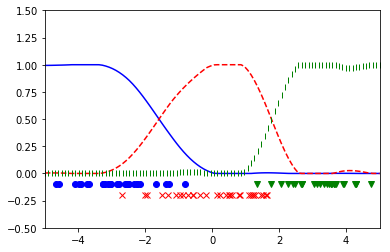

In [128]:
¡